In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from torchvision import transforms,datasets
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Activation
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import torch.nn.functional as F

Using TensorFlow backend.


In [3]:
Dir="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/"
Dir

'C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/'

In [4]:
classes=[]
img_classes=[]
n_images=[]
height=[]
width=[]
dim=[]
for folder in os.listdir(Dir):
    classes.append(folder)
    img=os.listdir("C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/"+folder)
    n_images.append(len(img))
    for i in img:
        img_classes.append(folder)
        img=np.array(Image.open(Dir+folder+"/"+i))
        height.append(img.shape[0])
        width.append(img.shape[1])
    dim.append(img.shape[2])

df=pd.DataFrame({"classes":classes,
                "number":n_images,
                 "dim":dim})

print("Random heights:" + str(height[10]), str(height[123]))
print("Random Widths:" + str(width[10]), str(width[123]))
df

Random heights:115 70
Random Widths:297 287


,classes,number,dim
0,airplane,727,3
1,car,968,3
2,cat,885,3
3,dog,702,3
4,flower,843,3
5,fruit,1000,3
6,motorbike,788,3
7,person,986,3


In [5]:
X=[]
Y=[]
for folder in (os.listdir(Dir)):
#     print(folder)
    path="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/"+folder+"/"     
    folder_data=os.listdir(path)
    for img in folder_data:
        img=cv2.imread(path+img)
        img_c=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_resize=cv2.resize(img_c,(80,80))
        X.append(np.array(img_resize))
        Y.append(label)

NameError: name 'label' is not defined

In [254]:
su=0
for i in df["number"]:
    su+=i
print(su)

6899


In [255]:
X=np.array(X)
Y=np.array(Y)

In [256]:
X.shape,Y.shape

((6899, 80, 80, 3), (6899,))

In [257]:
X=X/X.max()

In [258]:
y_encoder=LabelEncoder().fit_transform(Y)


In [259]:
Y=to_categorical(y,8)

In [260]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [261]:
np.random.shuffle(X)
np.random.shuffle(Y)

In [262]:
r = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = X[r]
Y = Y[r]

In [263]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.33)

In [264]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((4622, 80, 80, 3), (2277, 80, 80, 3), (4622, 8), (2277, 8))

In [265]:
len(y_categorical)

6899

In [266]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [267]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_x.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [268]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [269]:
history = model.fit(train_x, train_y, epochs=5, validation_split=0.2)

Train on 3697 samples, validate on 925 samples
Epoch 1/5
3697/3697 [==============================] - 81s 22ms/step - loss: 0.0175 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
3697/3697 [==============================] - 72s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
3697/3697 [==============================] - 73s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
3697/3697 [==============================] - 75s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
3697/3697 [==============================] - 66s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


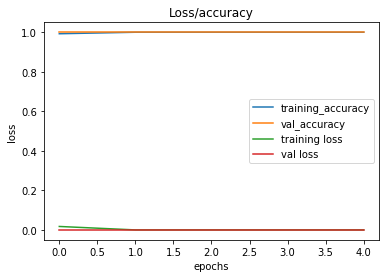

In [270]:
plt.plot(history.history["accuracy"],label="training_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.plot(history.history["loss"],label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [250]:
np.eye(8)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [315]:
REBUILD_DATA = True
class Natural_Image:
    Img_size=70
    airplane="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/airplane"
    car="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/car"
    cat="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/cat"
    dog="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/dog"
    flower="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/flower"
    fruit="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/fruit"
    motorbike="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/motorbike"
    person="C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/Natural Images/data/natural_images/person"
    
    Label={airplane:0,car:1,cat:2,dog:3,flower:4,fruit:5,motorbike:6,person:7}
    training_data=[]
    airplanecount=0
    carcount=0
    catcount=0
    dogcount=0
    flowercount=0
    fruitcount=0
    motorbikecount=0
    personcount=0
    
    def make_training(self):
        for label in self.Label:
            for f in os.listdir(label):
                if "jpg" in f:
                    path=os.path.join(label,f)
                    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img=cv2.resize(img,(self.Img_size,self.Img_size))
                    self.training_data.append([np.array(img),np.eye(8)[self.Label[label]]])
                    
                    if label==self.airplane:
                        self.airplanecount+=1
                    elif label==self.car:
                        self.carcount+=1
                    elif label==self.cat:
                        self.catcount+=1
                    elif label==self.dog:
                        self.dogcount+=1
                    elif label==self.flower:
                        self.flowercount+=1
                    elif label==self.fruit:
                        self.fruitcount+=1
                    elif label==self.motorbike:
                        self.motorbikecount+=1
                    elif label==self.person:
                        self.personcount+=1
        
        
        np.random.shuffle(self.training_data)
        np.save("tra_data2.npy",self.training_data)
        print('CATS:',natural_images.catcount)
        print('DOGS:',natural_images.dogcount)
        print('AIRPLANE:',natural_images.airplanecount)
        print('FRUIT:',natural_images.fruitcount)
        print('FLOWER:',natural_images.flowercount)
        print('PERSON:',natural_images.personcount)
        print('CAR:',natural_images.carcount)
        print('MOTORBIKE:',natural_images.motorbikecount)

In [316]:
if REBUILD_DATA:
    natural_images=Natural_Image()
    natural_images.make_training()

CATS: 885
DOGS: 702
AIRPLANE: 727
FRUIT: 1000
FLOWER: 843
PERSON: 986
CAR: 968
MOTORBIKE: 788


In [317]:
training_data=np.load("tra_data2.npy",allow_pickle=True)

In [319]:
len(training_data)

6899

c:\users\parikalp\appdata\local\programs\python\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


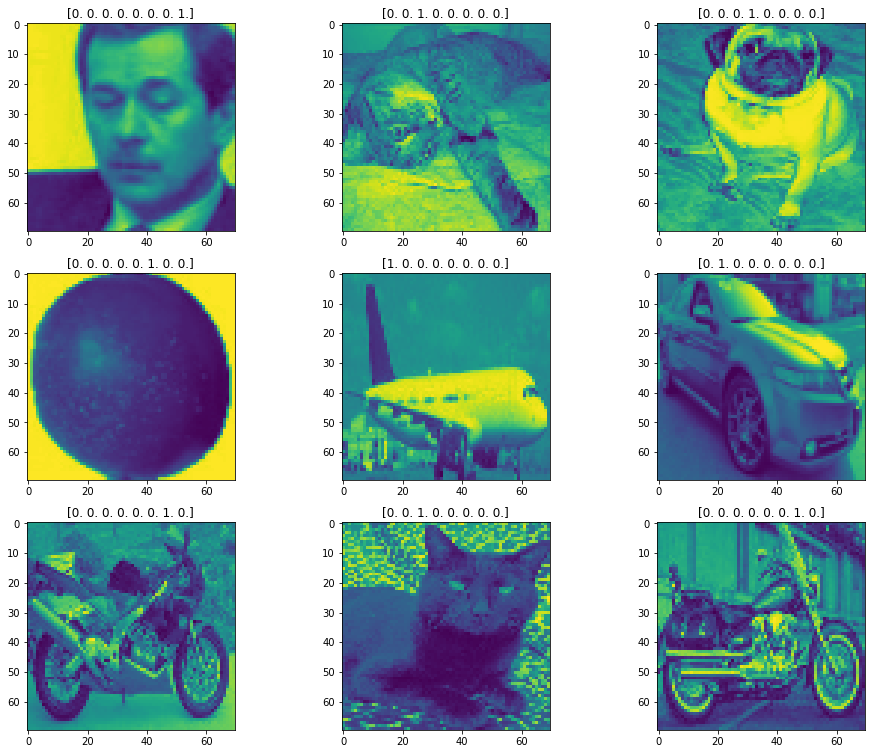

In [321]:
plt.rcParams["figure.figsize"]=[16,13]
plt.figure(33)
for i in range(331,340,1):
    plt.subplot(i)
    plt.imshow(training_data[i][0])
    plt.title(training_data[i][1])

In [532]:
X=torch.Tensor([i[0] for i in training_data]).view(-1,70,70)
Y=torch.Tensor([i[1] for i in training_data])

## X=X/X.max()

In [552]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,5)
        self.relu1=nn.ReLU()
        self.max1=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(32,64,5)
        self.relu2=nn.ReLU()
        self.max2=nn.MaxPool2d(kernel_size=2)
        
        self.conv3=nn.Conv2d(64,128,5)
        self.relu3=nn.ReLU()
        self.max3=nn.MaxPool2d(kernel_size=2)
        
        
        self.fc1=nn.Linear(128*5*5,8)

        
    def forward(self,x):
        out=self.conv1(x)
        out=self.relu1(out)
        out=self.max1(out)
        
        out=self.conv2(out)
        out=self.relu2(out)
        out=self.max2(out)
        
        out=self.conv3(out)
        out=self.relu3(out)
        out=self.max3(out)
        
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        return out

In [553]:
model=Net()

In [554]:
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.MSELoss()

In [555]:
val_PCL=0.2
val_size=int(len(X)*val_PCL)

In [556]:
val_size

1379

In [557]:
train_X = X[:-val_size]
train_y = Y[:-val_size]
test_X = X[-val_size:]
test_y = Y[-val_size:]

In [558]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

(torch.Size([5520, 70, 70]),
 torch.Size([1379, 70, 70]),
 torch.Size([5520, 8]),
 torch.Size([1379, 8]))

In [559]:
BATCH_SIZE = 200
EPOCHS = 23

In [561]:
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X=train_X[i:i+BATCH_SIZE].view(-1, 1, 70, 70)
        batch_Y=train_y[i:i+BATCH_SIZE]
        
        model.zero_grad()
        
        outputs=model(batch_X)
    
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss.data}")


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:30<00:00,  3.25s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 0. Loss: 0.06917472183704376



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:31<00:00,  3.26s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 1. Loss: 0.05669279024004936



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:36<00:00,  3.44s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 2. Loss: 0.04920826852321625



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:36<00:00,  3.45s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 3. Loss: 0.04469458758831024



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:38<00:00,  3.50s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 4. Loss: 0.04135071113705635



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:34<00:00,  3.36s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 5. Loss: 0.03840971365571022



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:36<00:00,  3.43s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 6. Loss: 0.03620178624987602



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:42<00:00,  3.65s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 7. Loss: 0.03443988040089607



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:38<00:00,  3.50s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 8. Loss: 0.03288488835096359



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:28<00:00,  3.16s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 9. Loss: 0.031439829617738724



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:43<00:00,  3.69s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 10. Loss: 0.03018798492848873



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:39<00:00,  3.55s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 11. Loss: 0.02876700833439827



100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:40<00:00,  3.60s/it]

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Epoch: 12. Loss: 0.02744564600288868



 11%|████████▉                                                                          | 3/28 [00:16<02:16,  5.45s/it]


KeyboardInterrupt: 

In [8]:
data="./Natural Images/data/natural_images/"

In [9]:
data_transform=transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [16]:
from torchvision.datasets import ImageFolder
import glob

In [11]:
img_dataset=ImageFolder(root=data,transform=data_transform)

In [14]:
os.listdir(data)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [18]:
airplane=glob.glob(data+"airplane/*.jpg")
car=glob.glob(data+"car/*.jpg")
cat=glob.glob(data+"cat/*.jpg")
dog=glob.glob(data+"dog/*.jpg")
flower=glob.glob(data+"flower/*.jpg")
fruit=glob.glob(data+"fruit/*.jpg")
motorbike=glob.glob(data+"motobike/*.jpg")
person=glob.glob(data+"person/*.jpg")

In [20]:
face=airplane+car+cat+dog+flower+fruit+motorbike+person

In [21]:
len(face)

6111